In [4]:
import pandas as pd

# 파일 경로와 시트 지정
file_path = r'C:\Users\zer12\Desktop\git-test\연봉별 퇴사율 조사.xlsx'
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 엑셀 파일의 첫 5개 행 출력
print("Step 1: 엑셀 파일 읽기")
print(df)  # 엑셀 파일의 첫 5개 행 출력
print("\n")


Step 1: 엑셀 파일 읽기
    Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0          NaN        회사명       평균연봉          총         IN        OUT   
1          NaN      S-Oil   15,698만원     3,462명        10명        13명   
2          NaN      SK텔레콤   12,095만원     5,255명         0명         0명   
3          NaN       삼성화재   12,578만원     5,597명        29명        22명   
4          NaN        NaN        NaN        NaN        NaN        NaN   
5          NaN      넥슨코리아    7,071만원     3,919명        77명        68명   
6          NaN       셀트리온    7,125만원     2,718명        48명        17명   
7          NaN     한미사이언스    7,012만원       439명         6명         7명   
8          NaN        NaN        NaN        NaN        NaN        NaN   
9          NaN       홈플러스    3,313만원    19,261명       203명       312명   
10         NaN       롯데쇼핑    5,125만원     5,058명       188명       188명   
11         NaN      메가스터디    5,406만원        97명         1명         3명   

   Unnamed: 6 Unnamed: 7     Unna

In [5]:
# Step 2: 데이터 정리 (회사명과 퇴사율 열만 사용)
df_cleaned = df[['Unnamed: 1', 'Unnamed: 7']].dropna()  # 회사명과 퇴사율 열만 사용
df_cleaned.columns = ['회사명', '퇴사율']  # 컬럼명 수정

print("Step 2: 데이터 정리")
print(df_cleaned)  # 정리된 데이터 출력
print("\n")


Step 2: 데이터 정리
       회사명    퇴사율
0      회사명    퇴사율
1    S-Oil  0.012
2    SK텔레콤      0
3     삼성화재  0.024
5    넥슨코리아  0.043
6     셀트리온  0.036
7   한미사이언스   0.05
9     홈플러스  0.077
10    롯데쇼핑  0.163
11   메가스터디  0.062




In [7]:
# Step 3: '퇴사율'을 숫자형으로 변환
df_cleaned['퇴사율'] = pd.to_numeric(df_cleaned['퇴사율'], errors='coerce')  # 숫자형으로 변환

print("Step 3: '퇴사율' 숫자형으로 변환")
print(df_cleaned)  # 변환된 데이터 출력
print("\n")


Step 3: '퇴사율' 숫자형으로 변환
       회사명    퇴사율
0      회사명    NaN
1    S-Oil  0.012
2    SK텔레콤  0.000
3     삼성화재  0.024
5    넥슨코리아  0.043
6     셀트리온  0.036
7   한미사이언스  0.050
9     홈플러스  0.077
10    롯데쇼핑  0.163
11   메가스터디  0.062




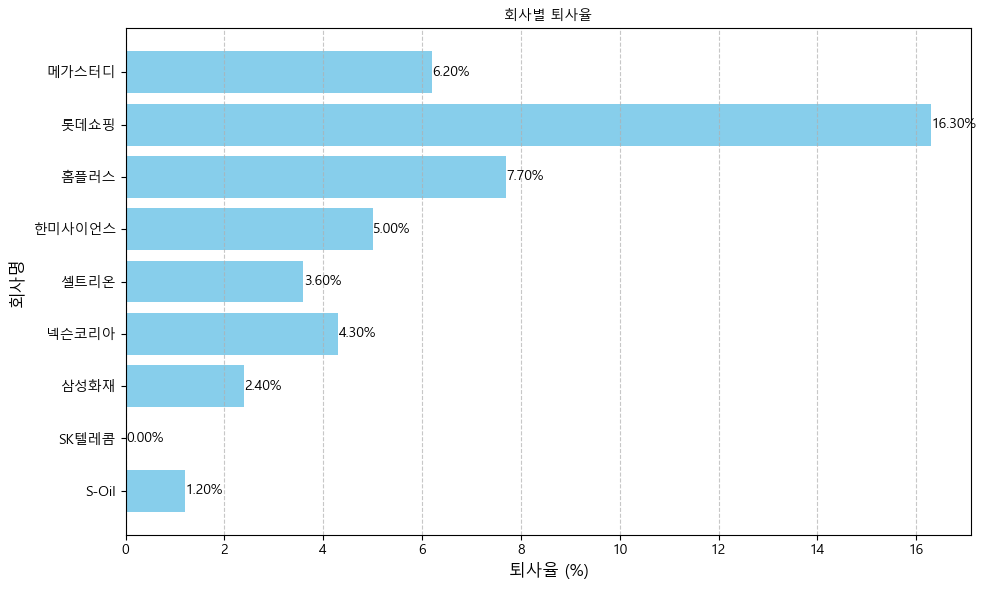

In [19]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 준비
company_names = ['S-Oil', 'SK텔레콤', '삼성화재', '넥슨코리아', '셀트리온', '한미사이언스', '홈플러스', '롯데쇼핑', '메가스터디']
turnover_rates = [1.20, 0.00, 2.40, 4.30, 3.60, 5.00, 7.70, 16.30, 6.20]  # 퇴사율

# 한글 폰트 설정 (Windows에서 '맑은 고딕'을 사용)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 한글 폰트 경로
prop = fm.FontProperties(fname=font_path)

# Step 4: 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(company_names, turnover_rates, color='skyblue')
plt.xlabel('퇴사율 (%)', fontsize=12, fontproperties=prop)
plt.ylabel('회사명', fontsize=12, fontproperties=prop)
plt.title('회사별 퇴사율', fontsize=15, fontproperties=prop)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Step 5: 퇴사율 값 텍스트로 표시
for i, v in enumerate(turnover_rates):
    plt.text(v + 0.01, i, f'{v:.2f}%', va='center', fontsize=10, fontproperties=prop)

# 그래프 출력
plt.tight_layout()
plt.show()
